In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyuvdata
import sys
sys.path.append("/Users/ruby/Astro/rlb_LWA/beam_manipulation")
import jones_to_mueller

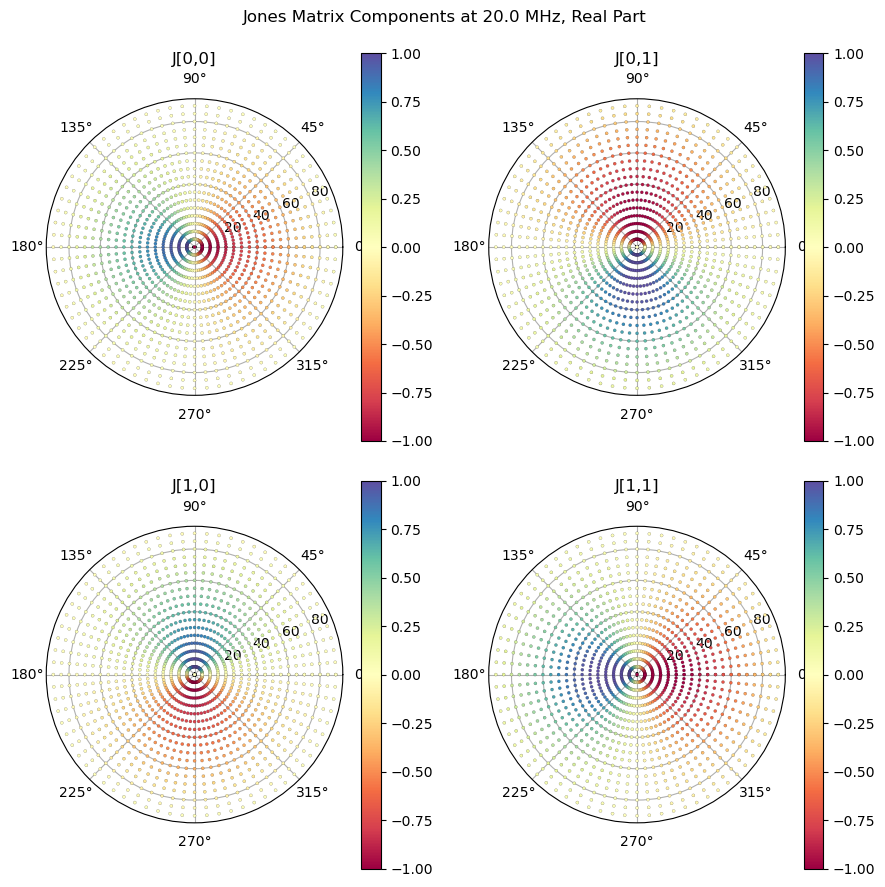

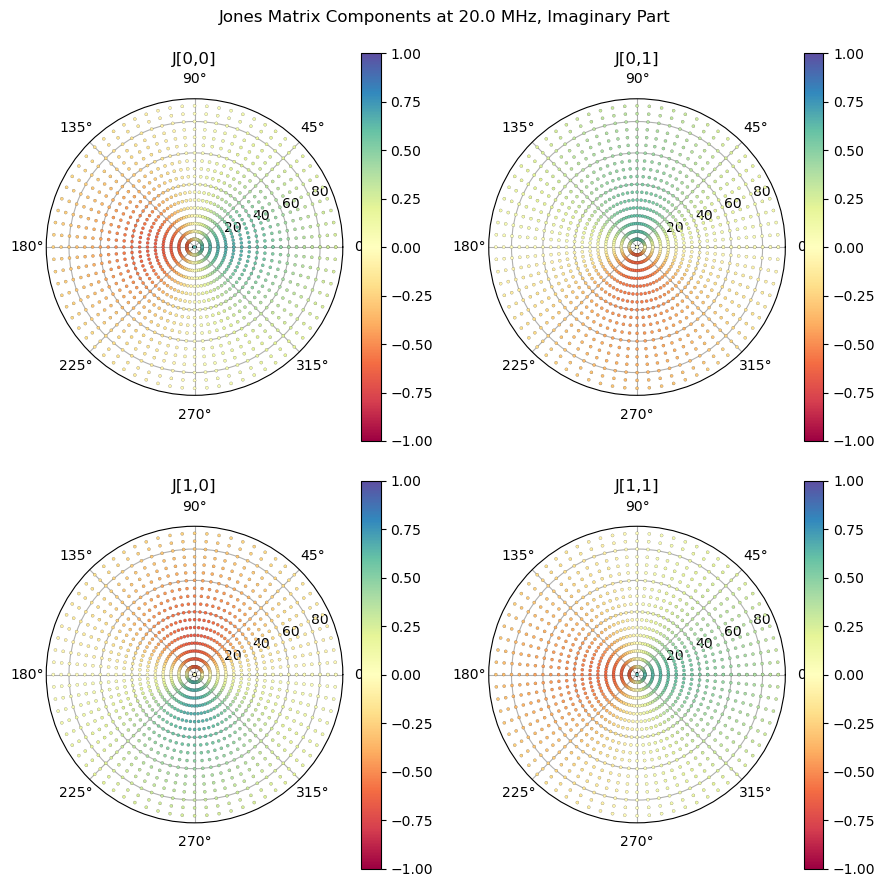

In [2]:
# Read beam simulation generated by David Woody, from Marin Anderson
beam = jones_to_mueller.read_beam_txt_file('/Users/ruby/Astro/LWA_beams/DW_beamquadranttable20151110.txt', header_line=6)
jones_to_mueller.plot_beam(beam, contour_plot=False, plot_freq=20.)
jones_to_mueller.plot_beam(beam, contour_plot=False, real_part=False, plot_freq=20.)

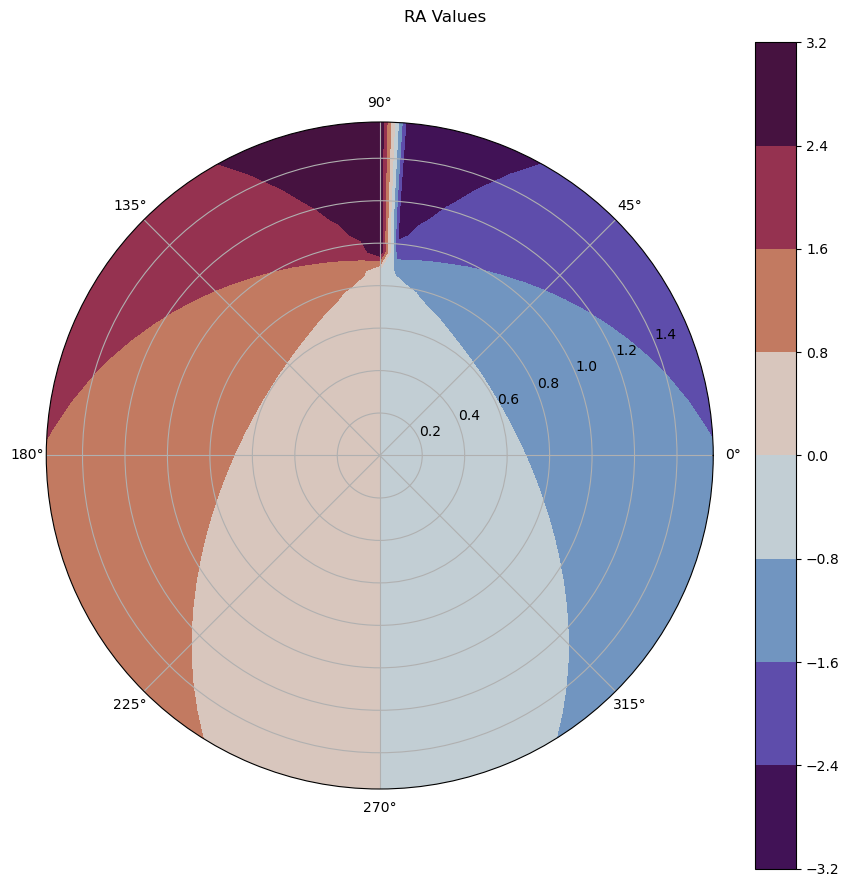

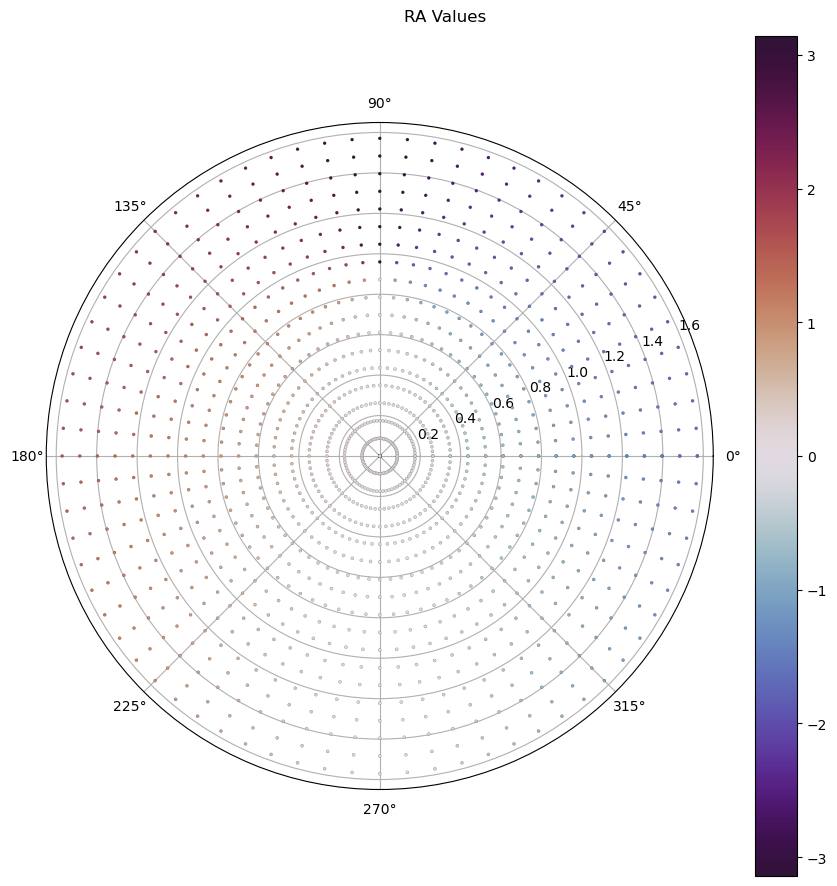

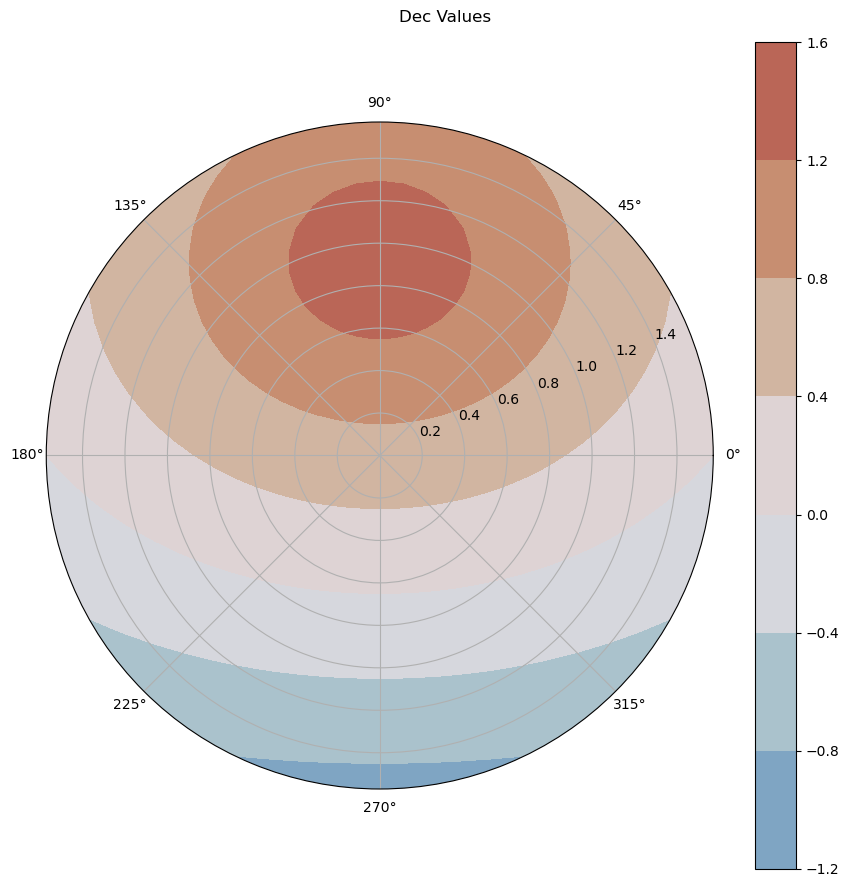

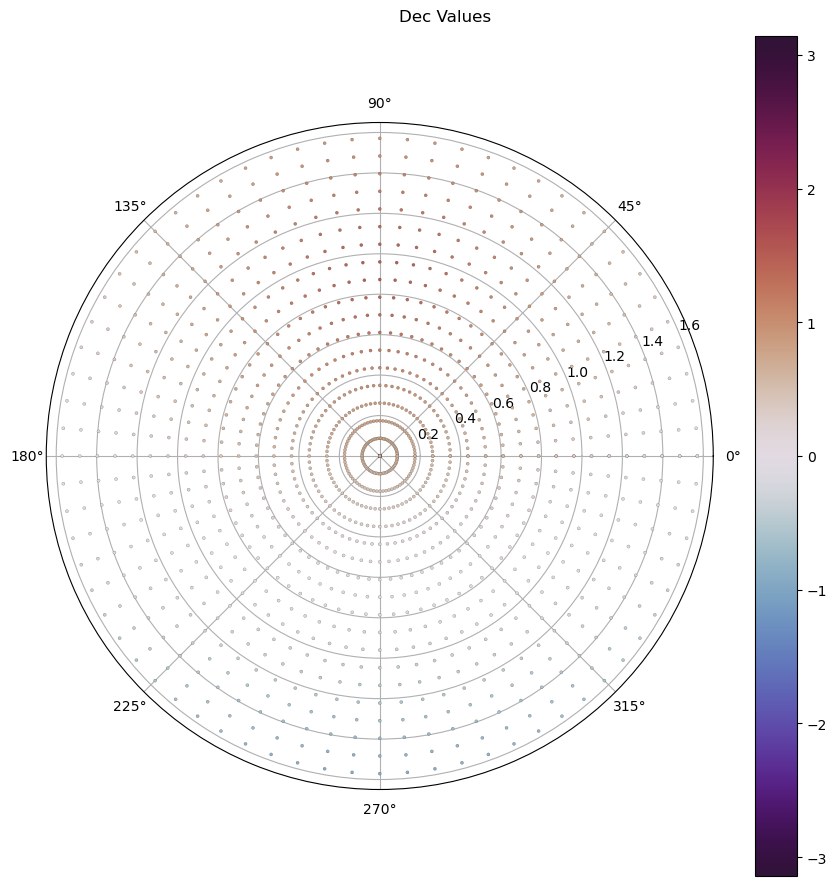

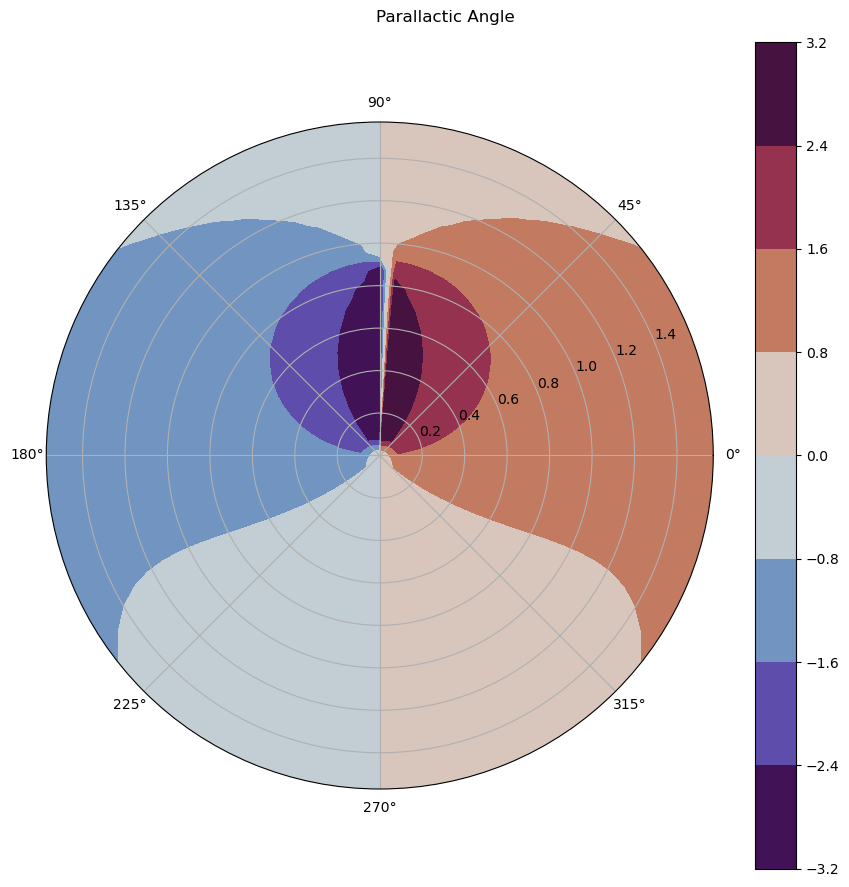

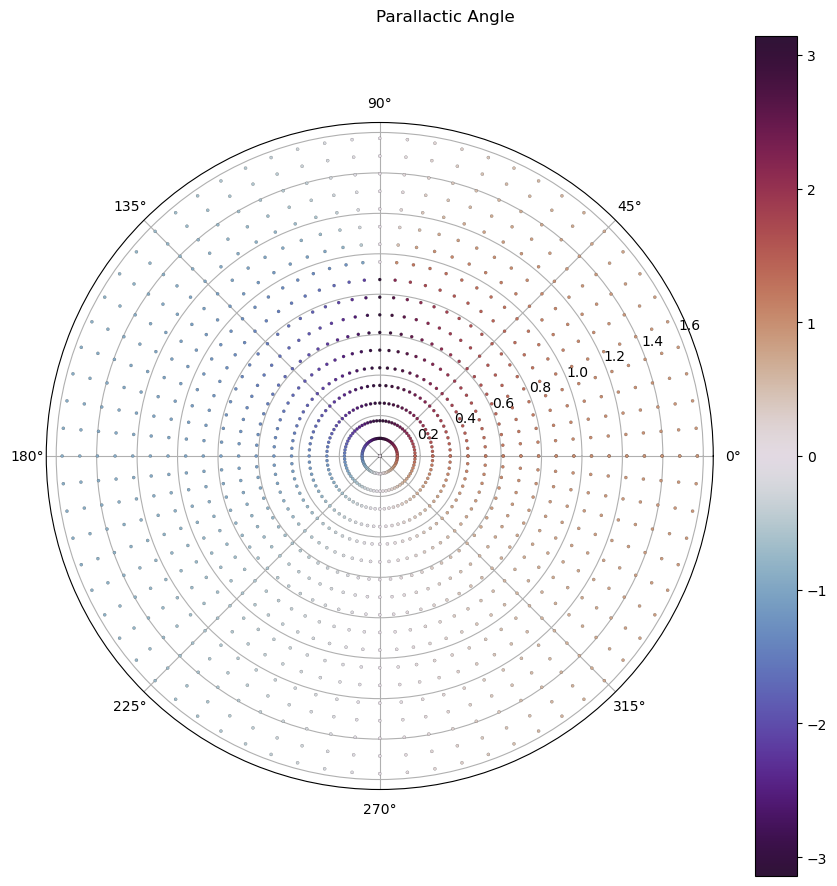

In [3]:
# Calculate coordinate transformation parameters
za_vals, az_vals = np.meshgrid(beam.axis2_array, beam.axis1_array)
ra_vals, dec_vals, parallactic_angle = jones_to_mueller.get_parallactic_angle(az_vals, za_vals)
jones_to_mueller.simple_polar_plot(
    ra_vals,
    az_vals,
    za_vals,
    vmin=-np.pi,
    vmax=np.pi,
    contour_plot=True,
    title="RA Values",
    cyclic_colorbar=True,
)
jones_to_mueller.simple_polar_plot(
    ra_vals,
    az_vals,
    za_vals,
    vmin=-np.pi,
    vmax=np.pi,
    contour_plot=False,
    title="RA Values",
    cyclic_colorbar=True,
)
jones_to_mueller.simple_polar_plot(
    dec_vals,
    az_vals,
    za_vals,
    vmin=-np.pi,
    vmax=np.pi,
    contour_plot=True,
    title="Dec Values",
    cyclic_colorbar=True,
)
jones_to_mueller.simple_polar_plot(
    dec_vals,
    az_vals,
    za_vals,
    vmin=-np.pi,
    vmax=np.pi,
    contour_plot=False,
    title="Dec Values",
    cyclic_colorbar=True,
)
jones_to_mueller.simple_polar_plot(
    parallactic_angle,
    az_vals,
    za_vals,
    vmin=-np.pi,
    vmax=np.pi,
    contour_plot=True,
    title="Parallactic Angle",
    cyclic_colorbar=True,
)
jones_to_mueller.simple_polar_plot(
    parallactic_angle,
    az_vals,
    za_vals,
    vmin=-np.pi,
    vmax=np.pi,
    contour_plot=False,
    title="Parallactic Angle",
    cyclic_colorbar=True,
)

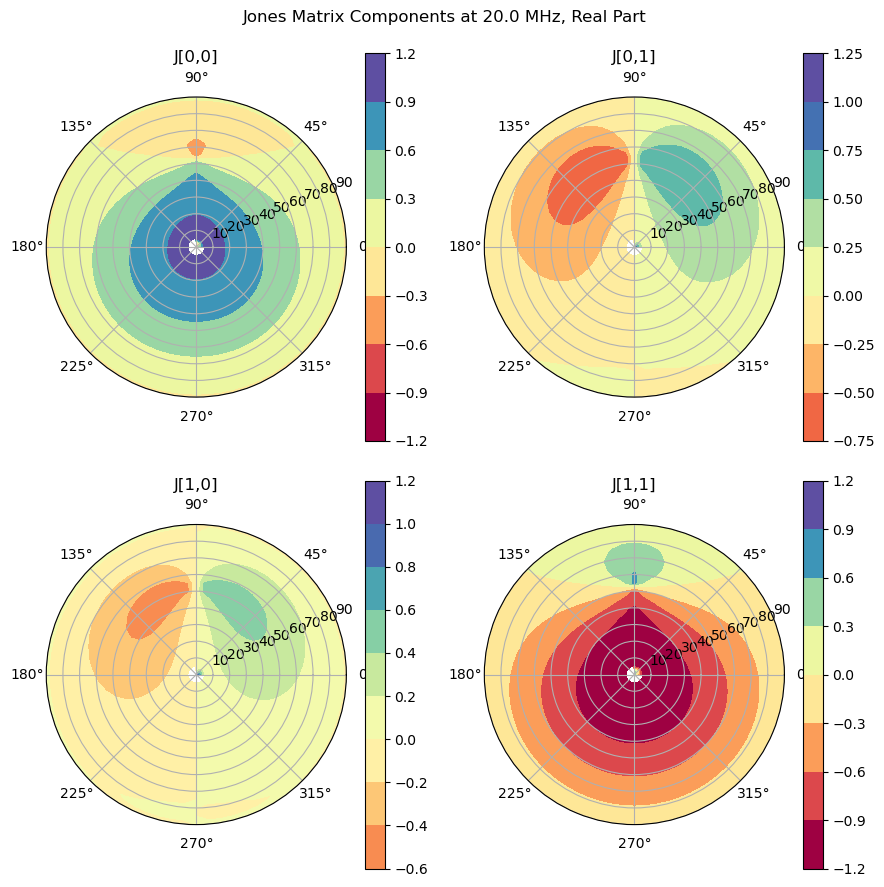

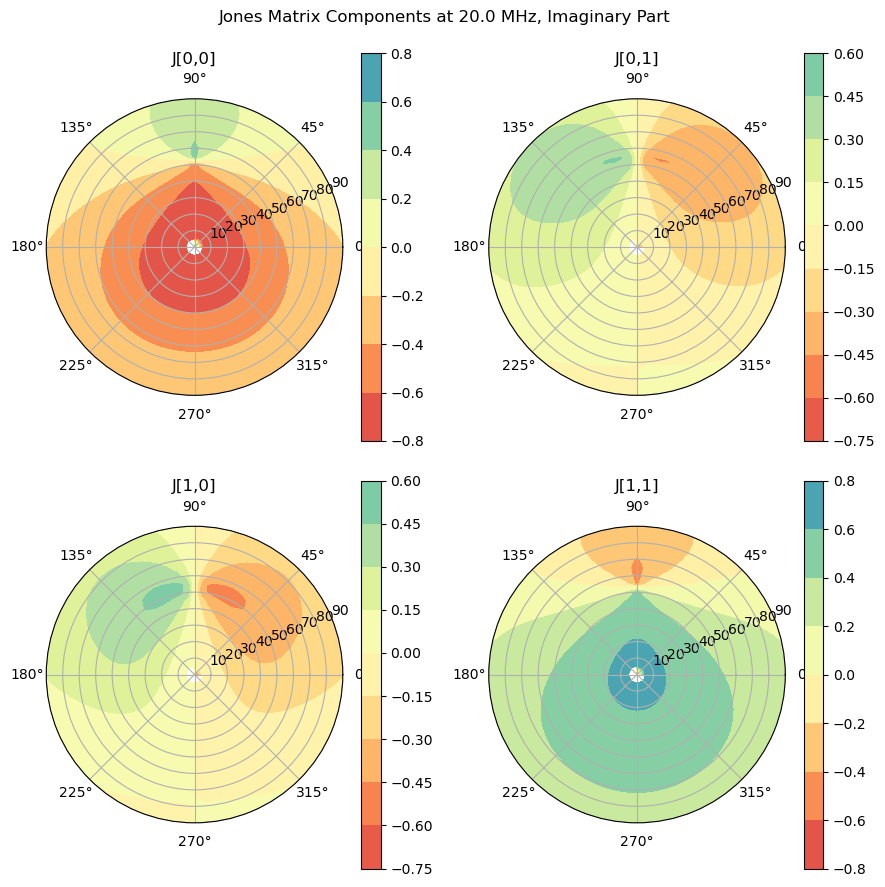

In [4]:
beam_new = jones_to_mueller.pol_basis_transform_azza_to_radec(beam, latitude=37.23, inplace=False)
jones_to_mueller.plot_beam(beam_new, contour_plot=True, plot_freq=20.)
jones_to_mueller.plot_beam(beam_new, contour_plot=True, real_part=False, plot_freq=20.)

In [5]:
mueller_coherency = jones_to_mueller.convert_jones_to_mueller(beam_new)
mueller_stokes = jones_to_mueller.pol_basis_transform_radec_to_stokes(mueller_coherency, inplace=False)

In [6]:
np.shape(mueller_coherency)

(4, 1, 4, 7, 19, 72)

Casting complex values to real discards the imaginary part


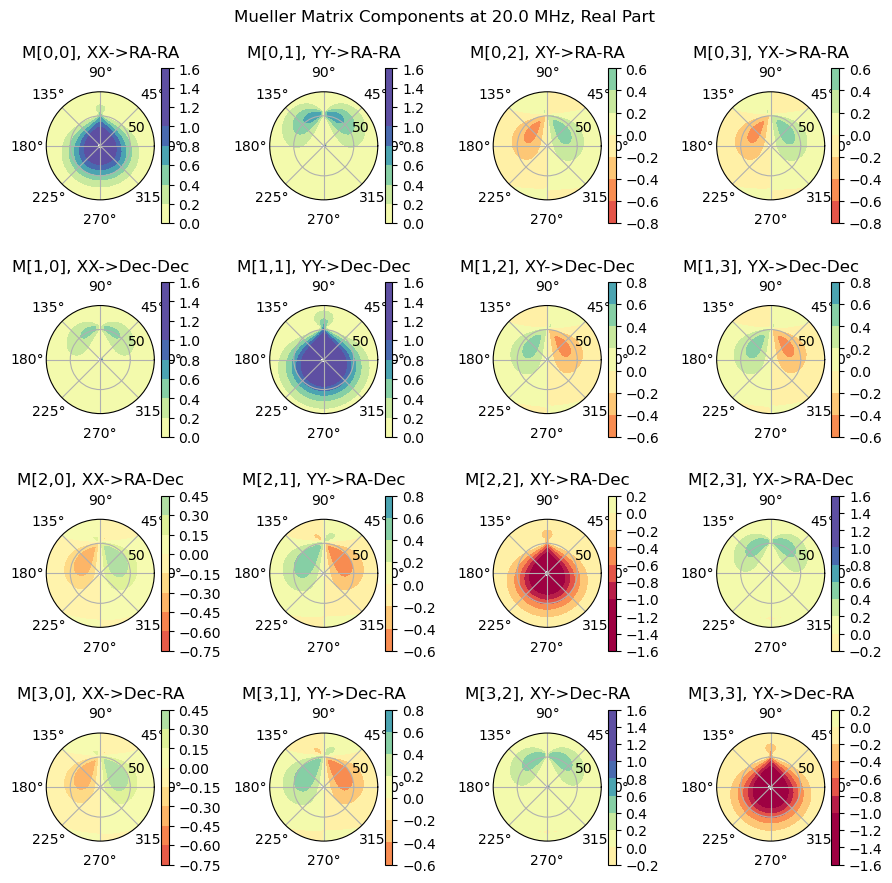

In [7]:
jones_to_mueller.plot_mueller_matrix(
    mueller_coherency,  # pyuvdata beam object
    np.degrees(beam_new.axis1_array),
    np.degrees(beam_new.axis2_array),
    beam_new.freq_array,
    plot_freq=20.0,  # frequency in MHz, must be included in the beam obj
    real_part=True,
    contour_plot=True,
    stokes=False,
)

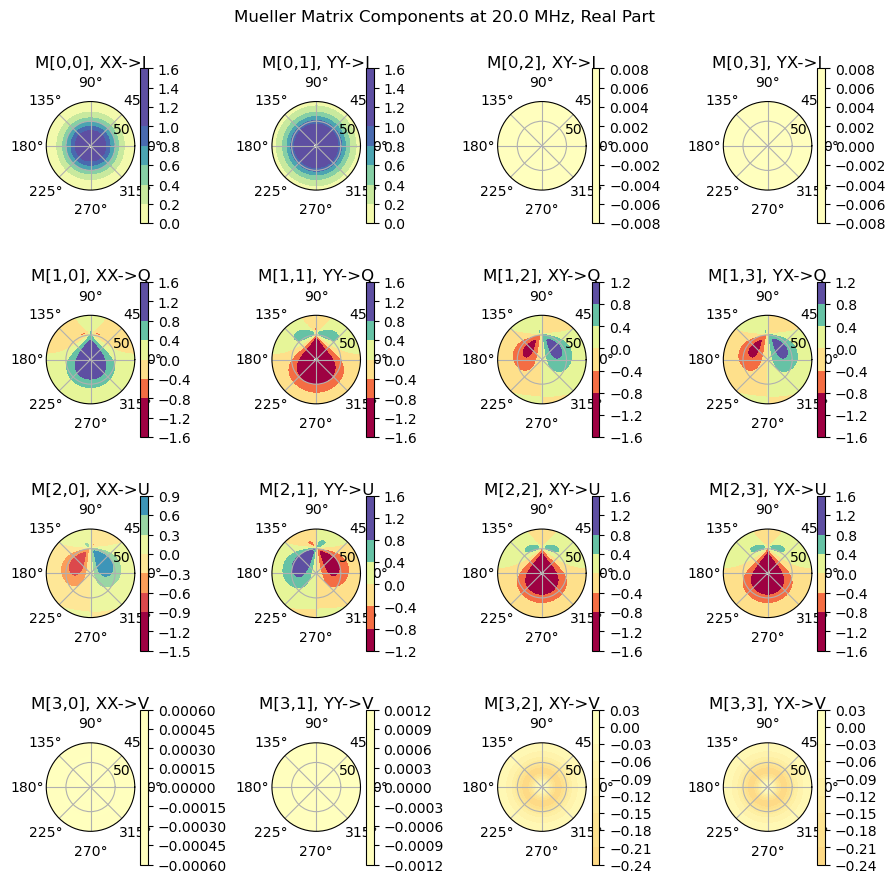

In [8]:
jones_to_mueller.plot_mueller_matrix(
    mueller_stokes,  # pyuvdata beam object
    np.degrees(beam_new.axis1_array),
    np.degrees(beam_new.axis2_array),
    beam_new.freq_array,
    plot_freq=20.0,  # frequency in MHz, must be included in the beam obj
    real_part=True,
    contour_plot=True,
    stokes=True,
)